In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
sns.set(rc={'figure.figsize':(11, 4)})

In [1]:
import psycopg2
import psql_credentials
con_psql = psycopg2.connect(
      dbname=psql_credentials.dbname,
      user=psql_credentials.user, host=psql_credentials.host,
      password=psql_credentials.password)
con_psql.set_session(autocommit=True)

In [5]:
with con_psql.cursor() as cur:
    playercount = 3
    raidHashes = [2659723068, 2497200493, 3458480158, 3845997235]
    membershipid = 4611686018468695677
    select_sql = f"""
            UPDATE "discordGuardiansToken"
            SET discordSnowflake = 206878830017773568
            WHERE discordSnowflake = 545256220412608512
        """
    with con_psql.cursor() as cur:
        cur.execute(select_sql)
        result = cur.fetchall()
        print(cur.fetchall())

In [38]:
#dsc for mitak
with con_psql.cursor() as cur:
    cur.execute('''
        UPDATE "discordGuardiansToken"
        SET
        refresh_token_expiry = %s
        WHERE 
        discordSnowflake = 238388130581839872;
    ''', (datetime.now() + timedelta(days=2),))
    print(cur.fetchone())
    #destinyID = 4611686018486927026
    #halizwick discordSnowflake = 795780197676613642
    #2021, 1, 4, 19, 31, 58
    #hali = 171650677607497730
    #meg = 101082228666171392

ProgrammingError: no results to fetch

In [5]:
with con_psql.cursor() as cur:
    cur.execute('''
        UPDATE "discordGuardiansToken"
        SET token_expiry = %s, 
        refresh_token_expiry = %s
        WHERE
        discordSnowflake = 171650677607497730;
    ''', (datetime.now(), datetime.now()))
con_psql.commit()

In [13]:
print(getSystemAndChars(4611686018484036005))

NameError: name 'getSystemAndChars' is not defined

# The user database

In [7]:
users = pd.read_sql_query('SELECT * FROM discordGuardiansToken', con)
users

,discordSnowflake,destinyID,signupDate,serverID,token,refresh_token,system
0,73386011039633408,4611686018468740696,1580649119,-1,None,None,None
1,98117080825475072,4611686018467293288,1580037823,-1,None,None,None
2,101082228666171392,4611686018467544385,1580075130,669293365900214293,None,None,None
3,108282146002608128,4611686018467952451,1580037854,-1,None,None,None
4,109016419059896320,4611686018467643119,1580037833,-1,None,None,None
...,...,...,...,...,...,...,...
168,412623169539801088,4611686018492604869,1603007770,669293365900214293,None,None,None
169,389150599452557333,4611686018471948664,1603293929,669293365900214293,None,None,None
170,188971798656843776,4611686018464019469,1603547077,669293365900214293,None,None,None
171,651154768118415417,4611686018458292809,1603547373,669293365900214293,None,None,None


In [4]:
users.count()

discordSnowflake    173
destinyID           173
signupDate          173
serverID            173
token                79
refresh_token        79
system                0
dtype: int64

## The Markov Pairs

In [8]:
mp = pd.read_sql_query('SELECT * FROM markovPairs', con)
mp

,word1,word2
0,__start__,never
1,never,tried
2,tried,"them,"
3,"them,",although
4,although,glue
...,...,...
466746,msg,is
466747,is,always
466748,always,:
466749,:,🙃


In [9]:
mp.count()

word1    466751
word2    466751
dtype: int64

# Some User Analysis
### Data Cleanup

In [10]:
users = users[users.discordSnowflake != 4611686018468433098]
users['signupDate'] =  pd.to_datetime(users['signupDate'], unit='s')

In [11]:
usersTS = users.set_index('signupDate').sort_index(ascending=False)
usersTS['date'] = usersTS.index.date

#### When did people signup with the bot?

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7f0fa263aa00&gt;

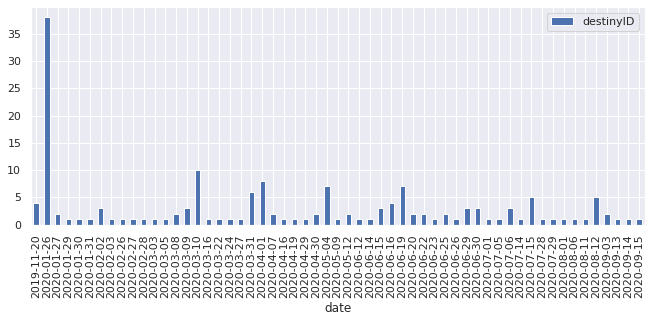

In [12]:
usersTS[['date', 'destinyID']].groupby('date').count().plot.bar()

In [13]:
cur.execute("""SELECT t1.instanceID, t1.period
                    FROM (  SELECT instanceID,period FROM activities
                            WHERE period < ?
                                AND mode = 4) t1
                    JOIN (  SELECT instanceID
                            FROM instancePlayerPerformance
                            WHERE playerID = ?
                            ) ipp 
                    ON (ipp.instanceID = t1.instanceID)
                    ORDER BY period DESC
                    LIMIT 1;""", (datetime.now(), 4611686018468695677))
print(cur.fetchall())


[(6972211886, &#39;2020-10-01 17:25:52&#39;)]


In [5]:
con.close()